In [128]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

data = pd.read_csv('/media/elyall/EvanMHD/from_Amir/toEvan/7737/7737_291_000_exp_AnalysisInfo_14.csv')


with open('/media/elyall/EvanMHD/from_Amir/toEvan/7737/7737_tracings.pkl', 'rb') as f:
    tracings = pickle.load(f)

In [11]:
C = list(data.columns)
print(C)

['StimID', 'TrialIndex', 'ExpFilename', 'DataFilename', 'nScans', 'ExpScans_1', 'ExpScans_2', 'ExpStimScans_1', 'ExpStimScans_2', 'ImgIndex', 'ImgFilename', 'nFrames', 'ExpFrames_1', 'ExpFrames_2', 'ExpStimFrames_1', 'ExpStimFrames_2', 'StimFrameLines_1', 'StimFrameLines_2', 'onlineRunSpeed', 'numRandomScansPost', 'WTStartScan_1', 'WTStartScan_2', 'WTStartScan_3', 'WTStartScan_4', 'WTStartScan_5', 'WTStartScan_6', 'WTStartScan_7', 'WTStartScan_8', 'WTStartScan_9', 'WTStartScan_10', 'WTStartScan_11', 'WTStartScan_12', 'WTStartScan_13', 'WTStartScan_14', 'WTStartScan_15', 'WTStartScan_16', 'WTStartScan_17', 'WTStartScan_18', 'WTStartScan_19', 'WTStartScan_20', 'WTStartScan_21', 'WTStartScan_22', 'WTStartScan_23', 'WTStartScan_24', 'WTStartScan_25', 'WTStartScan_26', 'WTStartScan_27', 'WTStartScan_28', 'WTStartScan_29', 'WTStartScan_30', 'WTStartScan_31', 'WTStartScan_32', 'WTStartScan_33', 'WTStartScan_34', 'WTStartScan_35', 'WTStartScan_36', 'WTStartScan_37', 'WTStartScan_38', 'WTStartS

In [148]:
# Compute mean number of touches per whisker
num_touches = data[['num_touches_'+f for f in np.arange(1,6).astype('str')]]
mean_touches = np.nanmean(num_touches,axis=0)
print(mean_touches)

[11.48253968  8.90851735 10.84935897  7.24683544 11.55555556]


In [191]:
# Pull out angle
num_frames = 10
angle = [[] for _ in range(5)]
for ind in np.arange(6): # whisker index
    for t in range(len(tracings[1])): # trial
        if ind in tracings[0]['touch'][t]: # whisker stimulated
            for f in tracings[0]['touch'][t][ind]: # touch event
                angle[ind-1].append(tracings[0]['angle'][t][ind][f-num_frames:f+num_frames+1])
num_frames = num_frames*2+1

3618
2822
3385
2288
3641


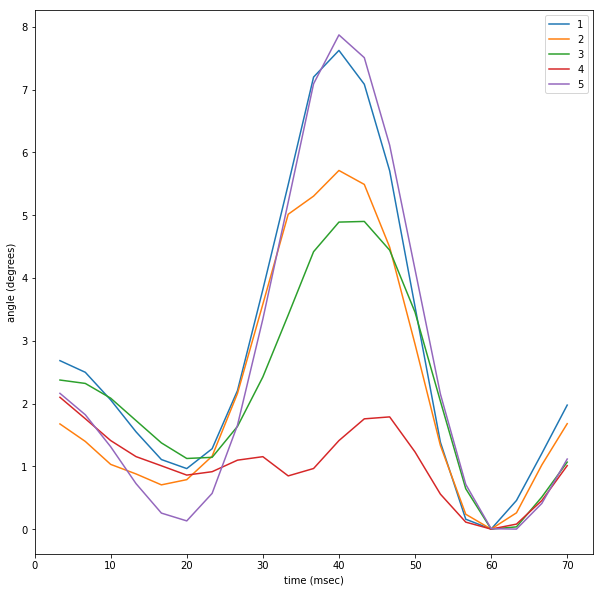

In [196]:
x = np.linspace(1/300*1000,num_frames/300*1000,num_frames)
fig, ax = plt.subplots(1, 1, figsize=(10,10))

for a in angle:
    print(len(a))
    frames = np.array([len(x) for x in a])
    a = np.vstack(list(compress(a, frames==num_frames)))
    mean_angle = np.nanmean(a, axis=0)
    mean_angle = mean_angle - np.min(mean_angle)
    ax.plot(x,mean_angle)
    
ax.set_ylabel('angle (degrees)')
ax.set_xlabel('time (msec)')
ax.legend(np.arange(1,6).astype('str'))